<img src="http://mybinder.org/assets/images/logo.svg" align="center">

## <center><font color='gray'>Data analysis and visualization. One click away. Interactive. On your browser.</font></center>

<img src='https://image.freepik.com/free-icon/first-step_318-11626.jpg' align="center" style="width:200px;height:100px;">

## <font color='deepskyblue'><center>Step 1: Load Octave packages and Nifti reader.</center></font>
### <font color='forestgreen'>You can click on the cells, then hit (ctrl+enter) to run them individually.</font>

In [111]:
setNifti; 
pkg load image;
pkg load statistics; 
pkg load optim;

curdir = pwd;
cd('/home/jovyan/work');
unix('tar -xvf /home/jovyan/work/dogSC_data.tar.gz');
addpath('/home/jovyan/work/Users/Agah/Desktop/OctaveJN/scn_rscn');
cd(curdir);

Already extracted and mexed
Ready.


<img src='https://image.freepik.com/free-icon/save-icon-silhouette_318-85112.jpg' align="center" style="width:100px;height:100px;">


## <font color='deepskyblue'><center>Step 2: Read dog spinal cord data and display an example!</center></font>
### <font color='darkorange'>Four different quantitative magnetization transfer methods are used:</font>
### <font color='gray'>1) Selective Inversion Recovery Fast Spin Echo (SIRFSE)</font>
### <font color='gray'>2) Spoiled Gradient Echo (SPGR)</font>
### <font color='gray'>3) Multi exponential T2: Myelin Water Fraction (MWF)</font>
### <font color='gray'>4) Proton Density; Macromolecular Tissue Volume (MTV)</font>

### <font color='forestgreen'>Please follow the comments in the following cell.</font>

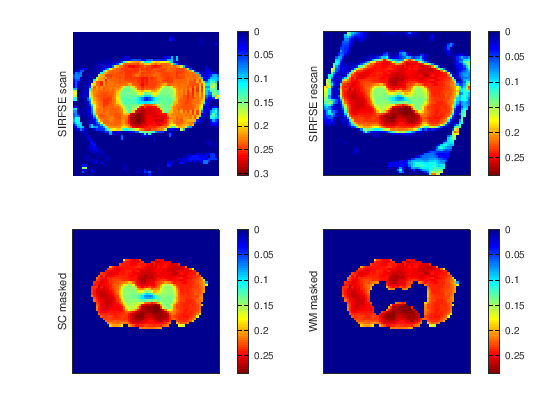

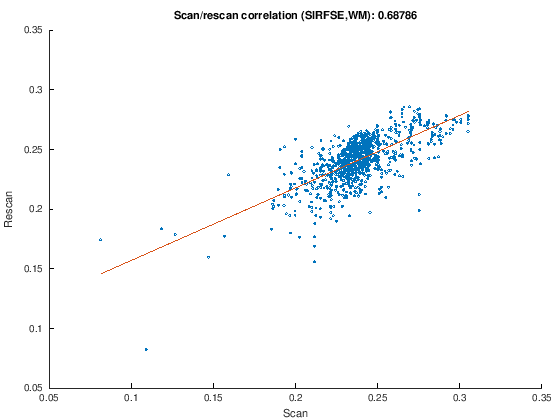

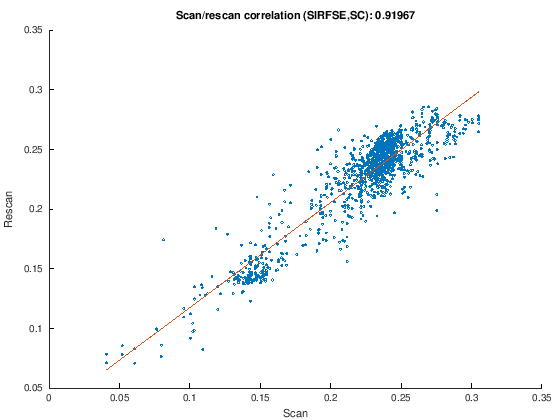

In [117]:
% ------------------ READ AND LOAD ------------------ START
warning('off');


scan = struct();
rescan = struct();
mask = struct();

scan.mwf  = cbiReadNifti('mwf_scan.nii');
scan.mtv  = cbiReadNifti('mtv_scan.nii');
scan.fsir = cbiReadNifti('Fsir_scan.nii');
scan.spgr = cbiReadNifti('Fspgr_scan.nii');

rescan.mwf  = cbiReadNifti('mwf_rescan.nii');
rescan.mtv  = cbiReadNifti('mtv_rescan.nii');
rescan.fsir = cbiReadNifti('Fsir_rescan.nii');
rescan.spgr = cbiReadNifti('Fspgr_rescan.nii');

mask.wm  = cbiReadNifti('mask_wm_scan.nii'); 
mask.sc =  cbiReadNifti('mask_wsc_scan.nii');

load MVF_histo_reg.mat; % This will load histology image which is registered on MR images. 

wmMask = logical(mask.wm.data);
scMask = logical(mask.sc.data);

% ------------------ READ AND LOAD ------------------ END 


% ------------------ INTERACT!  ------------------ START
% This section displays an example. 

% Default: SIRFSE data

% You can change scan.fsir.data & rescan.fsir.data variables
% e.g. with scan.mwf.data & rescan.mwf.data
% Please follow @ CHANGE labels. 
% ----------------------------------------------




subplot(2,2,1); imagesc(imrotate(scan.fsir.data,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('SIRFSE scan'); axis('off'); colormap('jet');

subplot(2,2,2); imagesc(imrotate(rescan.fsir.data,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('SIRFSE rescan'); axis('off'); colormap('jet');

subplot(2,2,3); imagesc(imrotate(rescan.fsir.data.*scMask,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('SC masked'); axis('off'); colormap('jet');

subplot(2,2,4); imagesc(imrotate(rescan.fsir.data.*wmMask,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('WM masked'); axis('off'); colormap('jet');

pos = get (gcf, "position"); 
pos(4) = pos(4) /2; 
set (gcf, "position", pos); 


tmpvec1 = scan.fsir.data(wmMask); % @ CHANGE
tmpvec2 = rescan.fsir.data(wmMask); % @ CHANGE
scr = corr(tmpvec1,tmpvec2);
figure; scatter(tmpvec1,tmpvec2);
title(['Scan/rescan correlation (SIRFSE,WM): ' num2str(scr)]); % @ CHANGE
xlabel('Scan'); ylabel('Rescan');
p = polyfit(tmpvec1,tmpvec2,1);   % p returns 2 coefficients fitting r = a_1 * x + a_2
r = p(1) .* tmpvec1 + p(2); % compute a new vector r that has matching datapoints in x
% now plot both the points in y and the curve fit in r
hold on;
plot(tmpvec1, r, '-');
hold off;


tmpvec1 = scan.fsir.data(scMask); % @ CHANGE
tmpvec2 = rescan.fsir.data(scMask); % @ CHANGE
scr = corr(tmpvec1,tmpvec2);
figure; scatter(tmpvec1,tmpvec2);
title(['Scan/rescan correlation (SIRFSE,SC): ' num2str(scr)]); % @ CHANGE
xlabel('Scan'); ylabel('Rescan');
p = polyfit(tmpvec1,tmpvec2,1);   % p returns 2 coefficients fitting r = a_1 * x + a_2
r = p(1) .* tmpvec1 + p(2); % compute a new vector r that has matching datapoints in x
% now plot both the points in y and the curve fit in r
hold on;
plot(tmpvec1, r, '-');
hold off;


% ------------------ INTERACT ------------------ END





<img src='https://image.freepik.com/free-icon/laptop-pie-chart-on-screen_318-55109.jpg' align="center" style="width:200px;height:200px;">

## <font color='deepskyblue'><center>Step 3: Calculate and visualize correlation matrices for scan, rescan & histology images!</center></font>



### <font color='darkorange'>Two correlation matrices will be calculated and visualized for two ROIs:</font>
### <font color='gray'>1) Whole spinal cord</font>
### <font color='gray'>2) White matter</font>

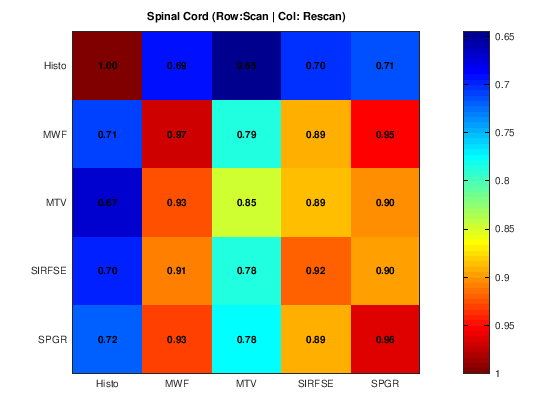

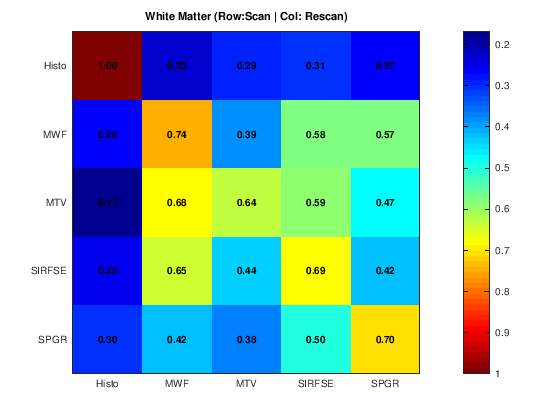

In [101]:
% ------------------ CALCULATE CORRELATION MATRIX ------------------ START



% 1) ROI: Whole spinal cord 
% 2) ROI: White matter 

imCor  = struct();


imCor(1).im = histo_reg;
imCor(1).name = 'Histo';


% Scan-rescan 
imCor(2).im = scan.mwf.data; %mwf_scan
imCor(2).name = 'mwf_scan';
imCor(3).im = rescan.mwf.data; %mwf_rescan
imCor(3).name = 'mwf_rescan';

imCor(4).im = scan.mtv.data;
imCor(4).name = 'mtv_scan';
imCor(5).im = rescan.mtv.data;
imCor(5).name = 'mtv_rescan';

imCor(6).im = scan.fsir.data;
imCor(6).name = 'fsir_scan';
imCor(7).im = rescan.fsir.data;
imCor(7).name = 'fsir_rescan';


imCor(8).im = scan.spgr.data;
imCor(8).name = 'spgr_scan';
imCor(9).im = rescan.spgr.data;
imCor(9).name = 'spgr_rescan';

a = [1 3 5 7 9];
b = [1 2 4 6 8]; 
[A,B] = meshgrid(a,b);
c=cat(2,A',B');
d=reshape(c,[],2);

wmCor_coef = zeros(length(d),1);
for i=1:length(d)
v1 = imCor(d(i,1)).im;
v2 = imCor(d(i,2)).im;
%disp([wmCor(d(i,1)).name ' ' wmCor(d(i,2)).name]); % You can check correspondances 
wmCor_coef(i,1) = corr(v1(wmMask),v2(wmMask));
scCor_coef(i,1) = corr(v1(scMask),v2(scMask));
end


wmCor_matrix = reshape(wmCor_coef,[5 5]);
scCor_matrix = reshape(scCor_coef,[5 5]);

% ------------------ CALCULATE CORRELATION MATRIX ------------------ END


% ------------------ DISPLAY ------------------ START
imagesc(scCor_matrix); colormap('jet')
h = colorbar;
set( h, 'YDir', 'reverse' );
textStrings = num2str(scCor_matrix(:),'%0.2f');  %# Create strings from the matrix values
textStrings = strtrim(cellstr(textStrings));  %# Remove any space padding
[x,y] = meshgrid(1:5);   %# Create x and y coordinates for the strings
hStrings = text(x(:),y(:),textStrings(:),...      %# Plot the strings
                'HorizontalAlignment','center');
midValue = mean(get(gca,'CLim'));  %# Get the middle value of the color range
set(hStrings,'color',[0 0 0]);
set(hStrings,'fontweight','bold');

set(gca,'XTick',1:5,...                         %# Change the axes tick marks
        'XTickLabel',{'Histo','MWF','MTV','SIRFSE','SPGR'},...  %#   and tick labels
        'YTick',1:5,...
        'YTickLabel',{'Histo','MWF','MTV','SIRFSE','SPGR'},...
        'TickLength',[0 0]);
title('Spinal Cord (Row:Scan | Col: Rescan)');


figure();
imagesc(wmCor_matrix); colormap('jet')
h = colorbar;
set( h, 'YDir', 'reverse' );
textStrings = num2str(wmCor_matrix(:),'%0.2f');  %# Create strings from the matrix values
textStrings = strtrim(cellstr(textStrings));  %# Remove any space padding
[x,y] = meshgrid(1:5);   %# Create x and y coordinates for the strings
hStrings = text(x(:),y(:),textStrings(:),...      %# Plot the strings
                'HorizontalAlignment','center');
midValue = mean(get(gca,'CLim'));  %# Get the middle value of the color range
set(hStrings,'color',[0 0 0]);
set(hStrings,'fontweight','bold');

set(gca,'XTick',1:5,...                         %# Change the axes tick marks
        'XTickLabel',{'Histo','MWF','MTV','SIRFSE','SPGR'},...  %#   and tick labels
        'YTick',1:5,...
        'YTickLabel',{'Histo','MWF','MTV','SIRFSE','SPGR'},...
        'TickLength',[0 0]);
title('White Matter (Row:Scan | Col: Rescan)');

% ------------------ DISPLAY ------------------ END



<center>The MIT License (MIT)</center>

<center>Copyright (c) 2014 Ecole Polytechnique, Université de Montréal</center>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<img src="https://avatars3.githubusercontent.com/u/7755716?v=4&s=200" align="center" style="width:128px;height:128px;">

